<a href="https://colab.research.google.com/github/GiovanniBorrelli/ClinicalDataSanitization/blob/main/GraphsGeneration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openpyxl pandas matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import Counter

Saving output_con_entita.xlsx to output_con_entita.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

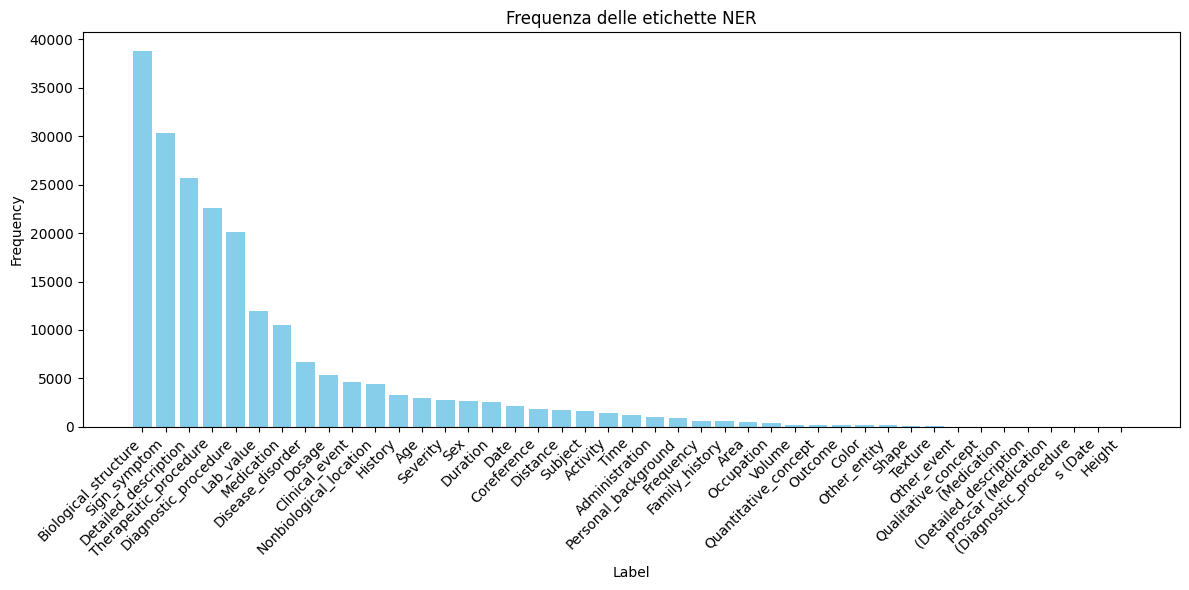

In [ ]:
# Caricamento manuale del file
from google.colab import files
uploaded = files.upload()

df = pd.read_excel(list(uploaded.keys())[0])

# Estrazione delle etichette (label tra parentesi tonde)
def extract_labels(entity_string):
    return re.findall(r'\(([^)]+)\)', str(entity_string))

all_labels = []

for row in df['entities']:
    labels = extract_labels(row)
    all_labels.extend(labels)

# Conteggio delle frequenze
label_counts = Counter(all_labels)
label_freq_df = pd.DataFrame(label_counts.items(), columns=['Label', 'Frequency'])
label_freq_df = label_freq_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Salvataggio dei risultati in un nuovo file Excel
output_filename = 'label_frequencies.xlsx'
label_freq_df.to_excel(output_filename, index=False)
files.download(output_filename)

# Grafico a barre
plt.figure(figsize=(12, 6))
plt.bar(label_freq_df['Label'], label_freq_df['Frequency'], color='skyblue')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Frequenza delle etichette NER')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# In questa cella: considero le 5 specializzazioni mediche più frequenti, e per ognuna di esse
# calcolo la frequenza delle etichette NER, per capire se questo attributo è rilevante
!pip install openpyxl pandas matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import Counter
from google.colab import files

# Upload del file
uploaded = files.upload()

df = pd.read_excel(list(uploaded.keys())[0])

# Funzione per estrarre le label tra parentesi
def extract_labels(entity_string):
    return re.findall(r'\(([^)]+)\)', str(entity_string))

# Lista delle specialità più frequenti
top_specialties = [
    'surgery',
    'consult - history and phy.',
    'cardiovascular / pulmonary',
    'orthopedic',
    'radiology'
]

# Per ogni specialità, filtriamo, estraiamo le label e salviamo un file
for specialty in top_specialties:
    df_spec = df[df['medical_specialty'] == specialty]

    # Estrazione delle label
    all_labels = []
    for row in df_spec['entities']:
        labels = extract_labels(row)
        all_labels.extend(labels)

    # Conteggio frequenze
    label_counts = Counter(all_labels)
    label_freq_df = pd.DataFrame(label_counts.items(), columns=['Label', 'Frequency'])
    label_freq_df = label_freq_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

    safe_name = specialty.strip().replace(" ", "_").replace("/", "_").replace("-", "_").replace(".", "")
    output_filename = f'label_frequencies_{safe_name}.xlsx'

    label_freq_df.to_excel(output_filename, index=False)
    files.download(output_filename)

Saving output_con_entita.xlsx to output_con_entita.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

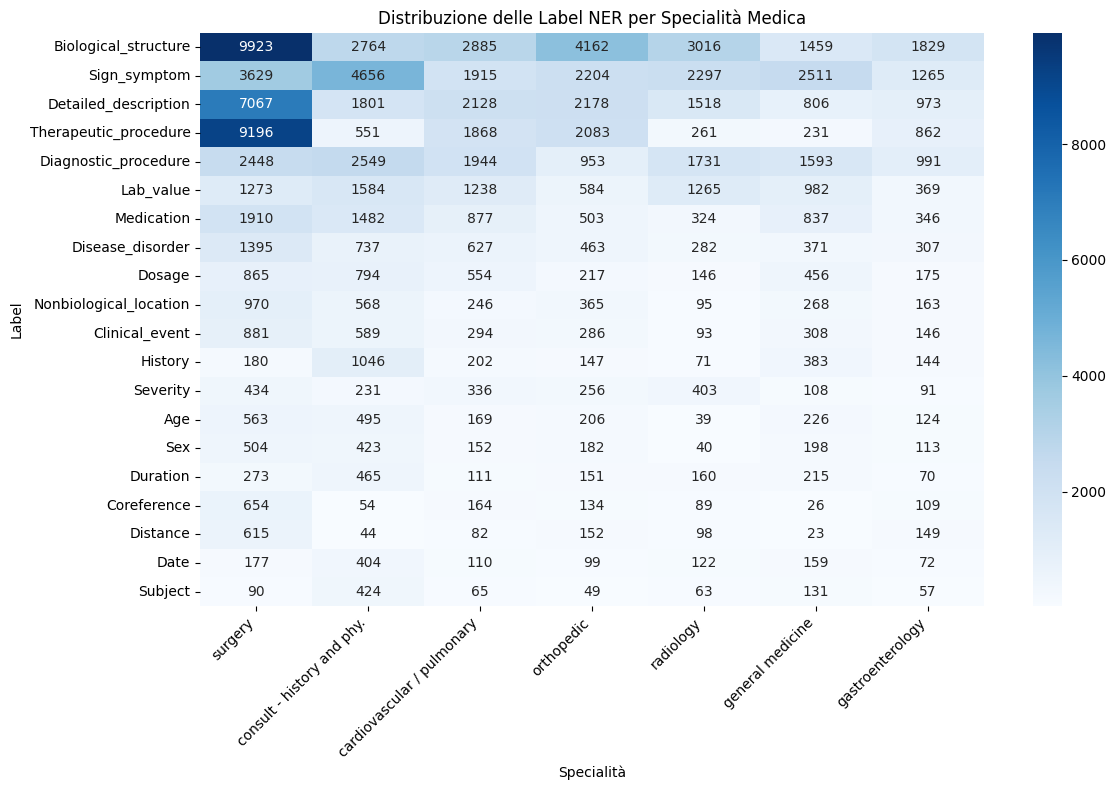

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specializzazioni mediche più frequenti
top_specialties = [
    'surgery',
    'consult - history and phy.',
    'cardiovascular / pulmonary',
    'orthopedic',
    'radiology',
    'general medicine',
    'gastroenterology'
]

specialty_label_counts = {}

for specialty in top_specialties:
    df_spec = df[df['medical_specialty'] == specialty]
    all_labels = []
    for row in df_spec['entities']:
        labels = extract_labels(row)
        all_labels.extend(labels)
    label_counts = Counter(all_labels)
    specialty_label_counts[specialty.strip()] = label_counts

# Crea DataFrame: righe=label, colonne=specialty
heatmap_df = pd.DataFrame(specialty_label_counts).fillna(0).astype(int)

# Filtra per le label più comuni
top_labels = heatmap_df.sum(axis=1).sort_values(ascending=False).head(20).index
heatmap_df = heatmap_df.loc[top_labels]

# Grafico
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_df, annot=True, fmt="d", cmap="Blues")
plt.title("Distribuzione delle Label NER per Specialità Medica")
plt.xlabel("Specialità")
plt.ylabel("Label")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
